In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import colorsys

import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from custom_linalg import rotation_matrix_by_2_vec
from vector_fields import fields, preview_flow
import vector_fields as vf

### vector_fields.py contains definitions of classes used to copute the field traces

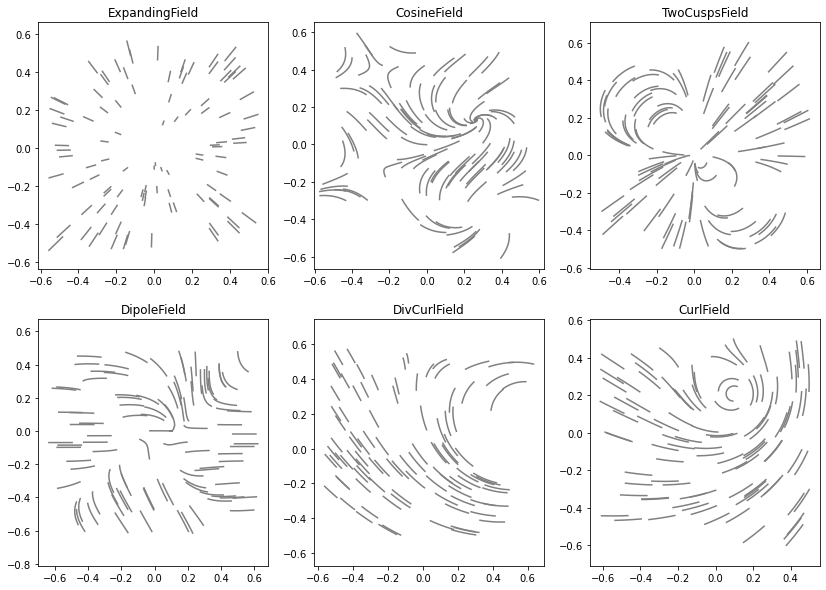

In [3]:
plt.rcParams['figure.figsize'] = [14, 10]
fig, subplots = plt.subplots((len(fields)+2)//3, 3)
for subplot, Field in zip([s for row in subplots for s in row], fields):
    field = Field()
    preview_flow(field, subplot=subplot)

In [4]:
plt.rcParams['figure.figsize'] = [10, 10]

## Small dots show initial points of traces
you may notice how they form a noisy square

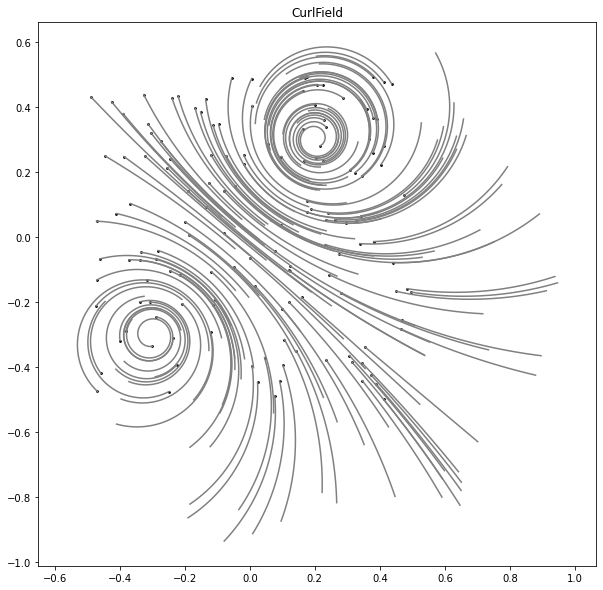

In [5]:
sources = ((np.array((-.3, -.3)), np.pi/2),
           (np.array((.2, .3)), -np.pi/2),
          )
field = vf.CurlField(sources=sources)
preview_flow(field, 144, 50, dots=True)

### Do you see spiders?

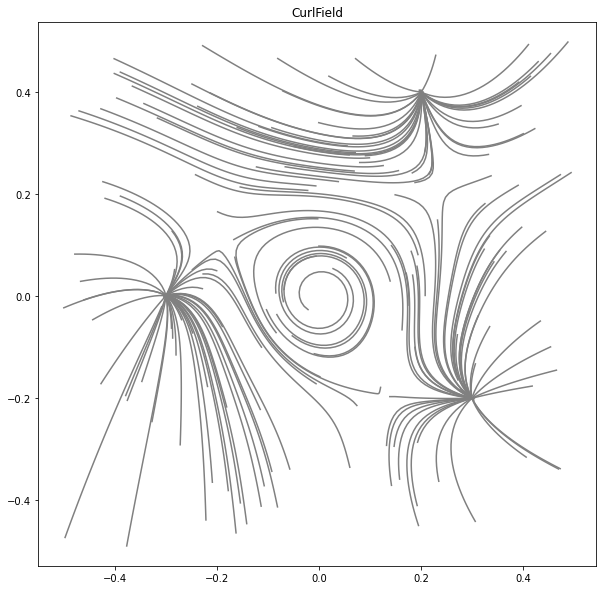

In [6]:
sources = ((np.array((.3, -.2)), np.pi),
           (np.array((.2, .4)), np.pi),
           (np.array((-.3, .0)), np.pi),
           (np.array((.0, .0)), np.pi/2),
          )
field = vf.CurlField(sources=sources)
preview_flow(field, 144, 50)

### And two more CurlField configurations

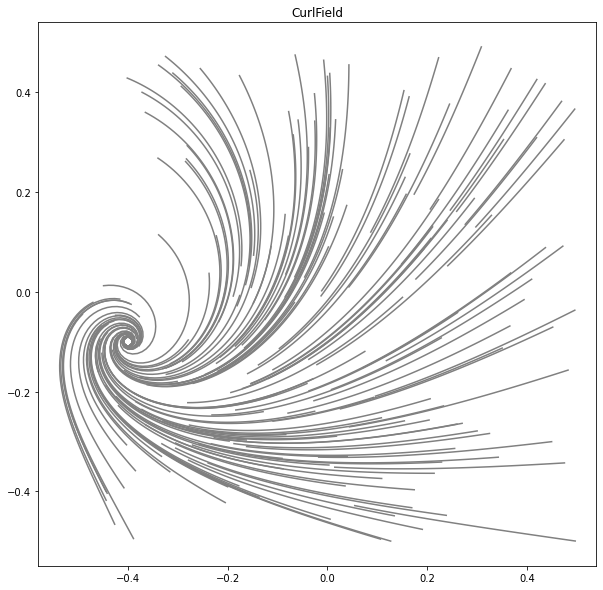

In [7]:
sources = ((np.array((-.4-.5, .2-.5)), -np.pi/2),
           (np.array((.1-.5, .4-.5)), 2*np.pi/3),
          )
field = vf.CurlField(sources=sources)
preview_flow(field, 144, 50)

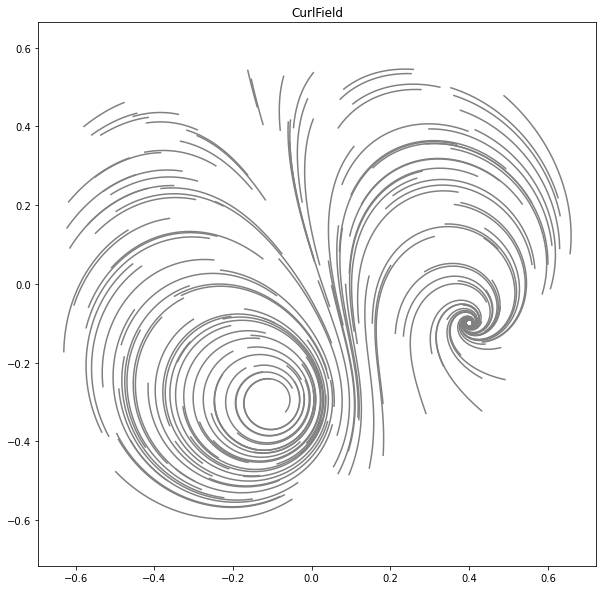

In [8]:
sources = ((np.array((-.1, -.3)), -np.pi/2),
           (np.array((.4, -.1)), 2*np.pi/3),
          )
field = vf.CurlField(sources=sources)
preview_flow(field, 144, 50)

# Adding colors

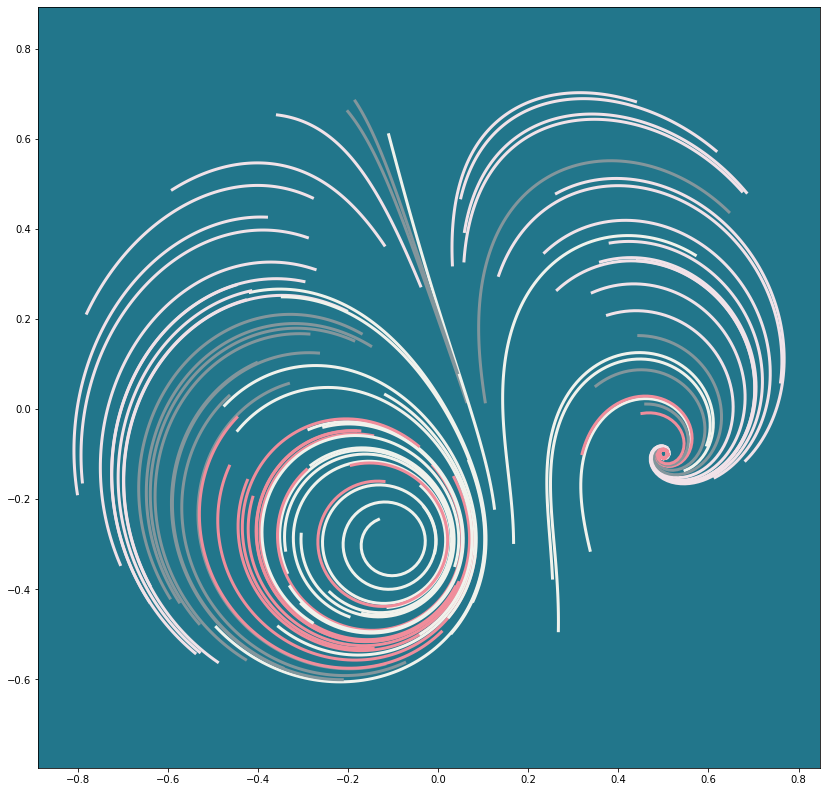

In [9]:
plt.rcParams['figure.figsize'] = [14, 14]
fig, subplot = plt.subplots()
subplot.axis('equal')

colors = ['#f0f2ec', '#f08d9b', '#f1e2e8', '#83969c', '#22768b']
fc = colors.pop()
subplot.set_facecolor(fc)  

sources = ((np.array((-.1, -.3)), -np.pi/2),
           (np.array((.5, -.1)), 2*np.pi/3),
          )
field = vf.CurlField(sources=sources)
n_traces = 70
trace_segments = 100
starting_points = np.random.rand(n_traces, 2) - np.array((.5, .5))
traces = field.compute_traces(starting_points, trace_segments)
for trace in traces:
    # to reduce color noise, I don't use random.choice(colors) here
    if trace[0][1] < -.2:
        c = colors[0]
    elif trace[0][1] < 0:
        c = colors[1]
    elif trace[0][1] < .2:
        c = colors[3]
    else:
        c = colors[2]
    subplot.plot(*trace.T, color=c, lw=3)

In [10]:
def rgb_norm_to_hex(rgb):
    return '#%02x%02x%02x' % tuple((rgb * 255).astype(int))

def hex_to_rgb_norm(color):
    return np.array([int(color[i+1:i+3], 16)/255. for i in (0, 2 ,4)])

def similar_color(color, max_delta=.1):
    rgb = hex_to_rgb_norm(color)
    hls = np.array(colorsys.rgb_to_hls(*rgb))
    noize = (np.random.rand(3) - .5) * max_delta
    h, l, s = hls
    h += min(abs(noize[0]), .005) * np.sign(noize[0])
    s += noize[1]
    l += noize[2]
    h %= 1.
    s = np.clip(s, 0, 1)
    l = np.clip(l, .05, .95)
    new_color = rgb_norm_to_hex(np.array(colorsys.hls_to_rgb(h, l, s)))
    return new_color

# Randomize colors, trace length and width

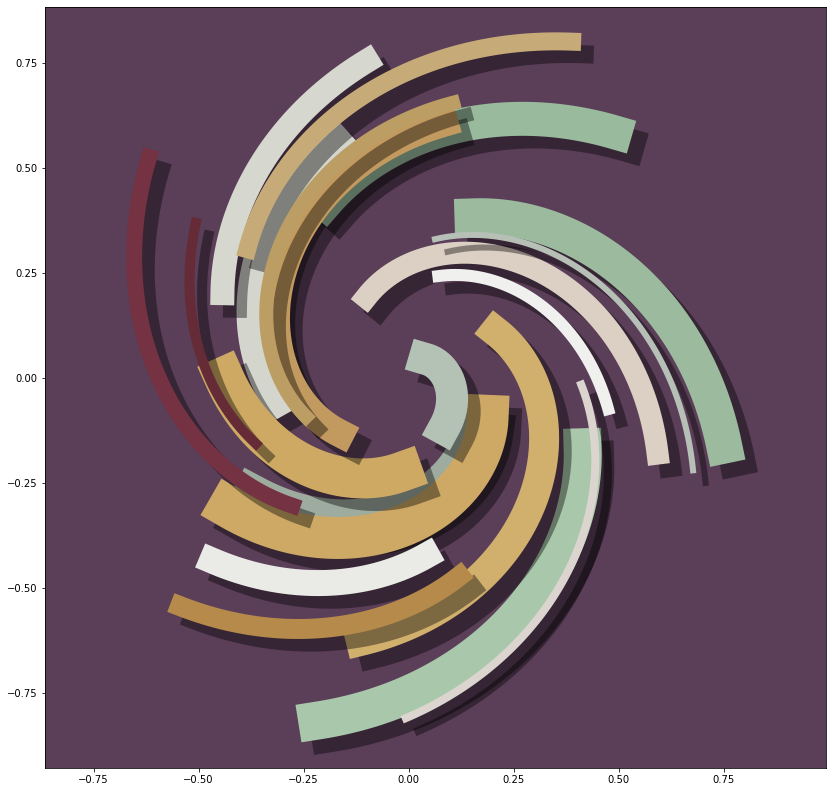

In [59]:
plt.rcParams['figure.figsize'] = [14, 14]
fig, subplot = plt.subplots()
subplot.axis('equal')

colors = ['#e3e4df', '#d3c7bb', '#c39e60', '#793141', '#5b3e58', '#a5bca7']
fc = colors.pop(4)
subplot.set_facecolor(fc)  

sources = ((np.array((0, 0)), np.pi/2.7),
          )
field = vf.CurlField(sources=sources)
trace_segments = 100
n = 6
starting_points = np.mgrid[-.5:.5:n*1j, -.5:.5:n*1j].reshape(2, -1).T + np.random.rand(n**2, 2) * .2
starting_points = [p for p in starting_points if la.norm(p) < .5]  # make it circle
np.random.shuffle(starting_points)
traces = field.compute_traces(starting_points, trace_segments)
for i, trace in enumerate(traces):
    c = similar_color(np.random.choice(colors), max_delta=.15)
    l = int(np.random.normal(loc=90, scale=40))
#     lw = np.random.randint(15, 44)
    lw = 46 - i*2
    subplot.plot(*(trace[:l] + (.03, -.03)).T, color='black', lw=lw, alpha=.4)  # "shadow"
    subplot.plot(*trace[:l].T, color=c, lw=lw)

# Using different linestyle

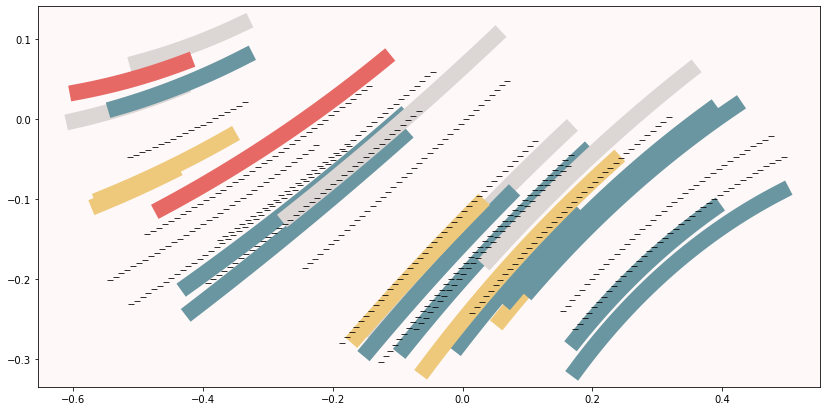

In [41]:
plt.rcParams['figure.figsize'] = [14, 7]
fig, subplot = plt.subplots()

colors = ['#eec97c', '#e66965', '#dcd6d5', '#6a96a2']
subplot.set_facecolor('#fef9f8')  

sources = ((np.array((-.4, .7)), np.pi/2),
           (np.array((.6, -.6)), -np.pi/2),
          )
field = vf.CurlField(sources=sources)

trace_segments = 40
n = 22
X = np.random.rand(n) - .5
Y = (np.random.rand(n) - .5) * .25
starting_points = np.column_stack((X, Y))
traces = field.compute_traces(starting_points, trace_segments)

def cut(trace):
    for i, (x, y) in enumerate(trace):
        if x > .5 or x < -.5 or y > .25 or y < -.25:
            return trace[:i+np.random.randint(1, 12)]
    return trace

for trace in traces:
    c = np.random.choice(colors)
    trace = cut(trace)
    subplot.plot(*trace.T, color=c, lw=16)

n = 13
X = np.random.rand(n) - .5
Y = (np.random.rand(n) - .5) * .15
starting_points = np.column_stack((X, Y))
traces = field.compute_traces(starting_points, trace_segments)
for trace in traces:
    trace = cut(trace)
    subplot.plot(*trace.T, '_', color='black', alpha=.8, lw=5)

# Day 4 of Genuary2022: "The next next Fidenza"

In [144]:
def flag(subplot, x_offset=0, y_offset=0, trace_segments=22):
    n = 18
    trace_segments += 2
    Y = np.linspace(-.2, .2, n) + y_offset
    X = np.linspace(-.02, .02, n) + x_offset
    #X = np.zeros(n) + x_offset
    starting_points = np.column_stack((X, Y))
    noise = np.column_stack((np.zeros(n), (np.random.rand(n)) * .015))
    starting_points += noise
    traces = field.compute_traces(starting_points, trace_segments)
    prev_color = '#nononono'
    
    for i in range(n-1):
        # some colors don't get well together
        if prev_color == '#6a96a2':
            c = np.random.choice(colors[:-1])
        elif prev_color == '#e66965':
            c = np.random.choice(colors[:3] + ['#e66965'])
        else:
            c = np.random.choice(colors)
        trace1 = traces[i][7:][::-1]
        trace2 = traces[i+1][7:]
        subplot.fill(*np.r_[trace1, trace2].T, color=c)
        prev_color = c

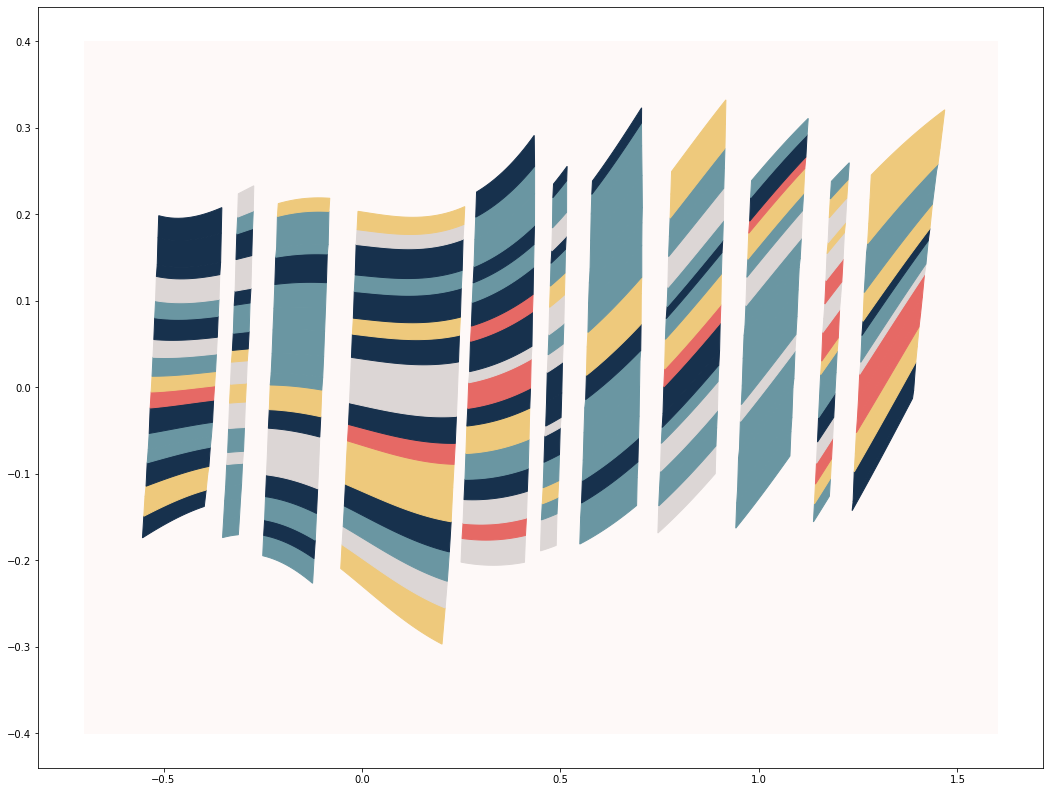

In [145]:
plt.rcParams['figure.figsize'] = [18, 14]
fig, subplot = plt.subplots()

colors = ['#eec97c', '#17314d', '#dcd6d5', '#6a96a2', '#6a96a2', '#e66965']

sources = (
           (np.array((1.9, .4)), np.pi),
           (np.array((1.9, .4)), np.pi),
           (np.array((.2, .5)), -np.pi/2),
           (np.array((-.5, .4)), -np.pi/2),
           (np.array((-.3, -.4)), np.pi/2),
          )
field = vf.CurlField(sources=sources)

subplot.fill_between([-.7, 1.6], -.4, .4, color='#fef9f8')

flag(subplot, x_offset=-.6, trace_segments=22)
flag(subplot, x_offset=-.4, trace_segments=10)
flag(subplot, x_offset=-.3, trace_segments=19)
flag(subplot, x_offset=-.1, trace_segments=33)
flag(subplot, x_offset=.2)
flag(subplot, x_offset=.4, trace_segments=10)
flag(subplot, x_offset=.5, trace_segments=21)
flag(subplot, x_offset=.7)
flag(subplot, x_offset=.9, trace_segments=22)
flag(subplot, x_offset=1.1, trace_segments=11)
flag(subplot, x_offset=1.2, trace_segments=26)
#plt.savefig('../../Pictures/generative/day4-test-color-OK-2.png', dpi=172)

In [13]:
def add_noize_to_path(p, max_delta=.13, e=1e-4):
    k = len(p.vertices)
    noize = (np.random.rand(k, 2) - (.5, .5)) * max_delta
    for i in range(2*k):
        if la.norm(p.vertices[i%k] - p.vertices[(i-1)%k]) < e:
            noize[i%k] = noize[(i-1)%k]
    p.vertices += noize

In [14]:
def get_path():
    return patches.Path(
        np.array([[0.0,  0.27],
                  [0.0,  0.27],
                  [0.35, 0.02],
                  [0.74, 0.01],
                  [0.96, 0.0],
                  [1.0,  0.23],
                  [1.0,  0.31],
                  [1.0,  0.39],
                  [0.83, 0.58],
                  [0.7,  0.56],
                  [0.33, 0.5],
                  [0.0, 0.27],
                  [0.0, 0.27],
                  [0.0, 0.27],
                  [0.0, 0.27],
        ]),
        np.array([patches.Path.MOVETO,
                  *([patches.Path.CURVE4] * 12),
                  patches.Path.LINETO,
                  patches.Path.CLOSEPOLY,
                 ]))

# Replace lines with aligned shapes

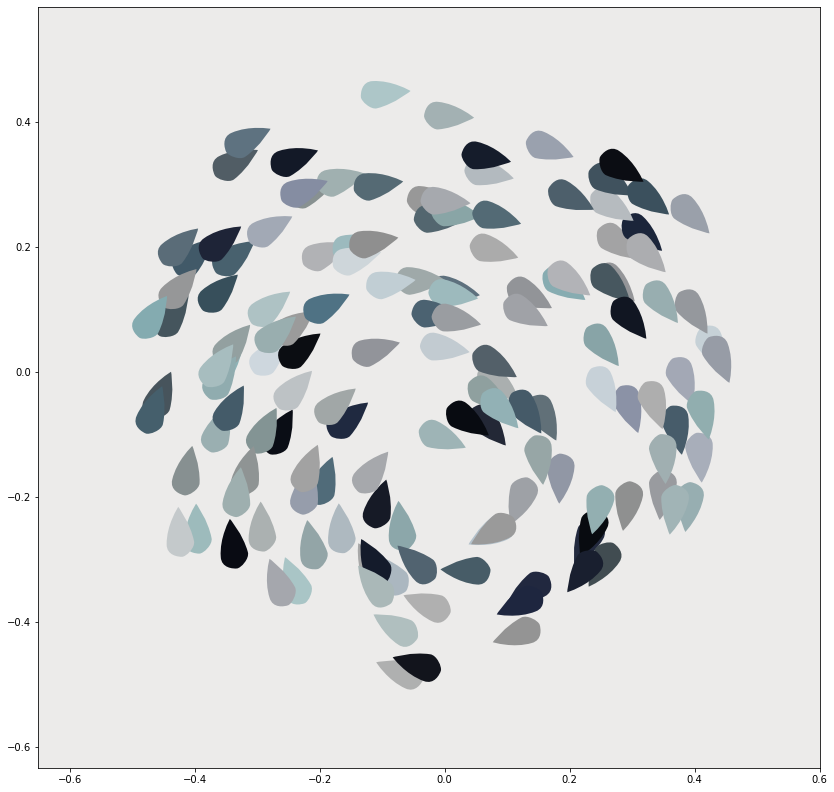

In [17]:
plt.rcParams['figure.figsize'] = [14, 14]
fig, subplot = plt.subplots()
subplot.axis('equal')
subplot.set_xlim(-.65, .6)
subplot.set_ylim(-.65, .6)

colors = ['#9fa3ac', '#9bb6b8', '#161b28', '#4c616d', '#bdc7cd', '#9ca2a2']
fc = '#ecebea'
subplot.set_facecolor(fc)  

sources = ((np.array((-0, -.2)), -np.pi/2),
          )
field = vf.CurlField(sources=sources)

trace_segments = 2
n = 14
starting_points = np.random.rand(n_traces, 2) - np.array((.5, .5))
starting_points = [p for p in starting_points if la.norm(p) < .5]  # make it circle
traces = field.compute_traces(starting_points, trace_segments)
for trace in traces:
    u, v = trace[1] - trace[0]
    p = get_path()        
    r = rotation_matrix_by_2_vec((u, v), (1, 0))
    p.vertices *= .08
    p.vertices = p.vertices.dot(r)
    p.vertices += trace[0]
    c = similar_color(np.random.choice(colors), max_delta=.15)
    patch = patches.PathPatch(p, alpha=1, lw=0, fc=c)
    subplot.add_patch(patch)

# Randomize shapes

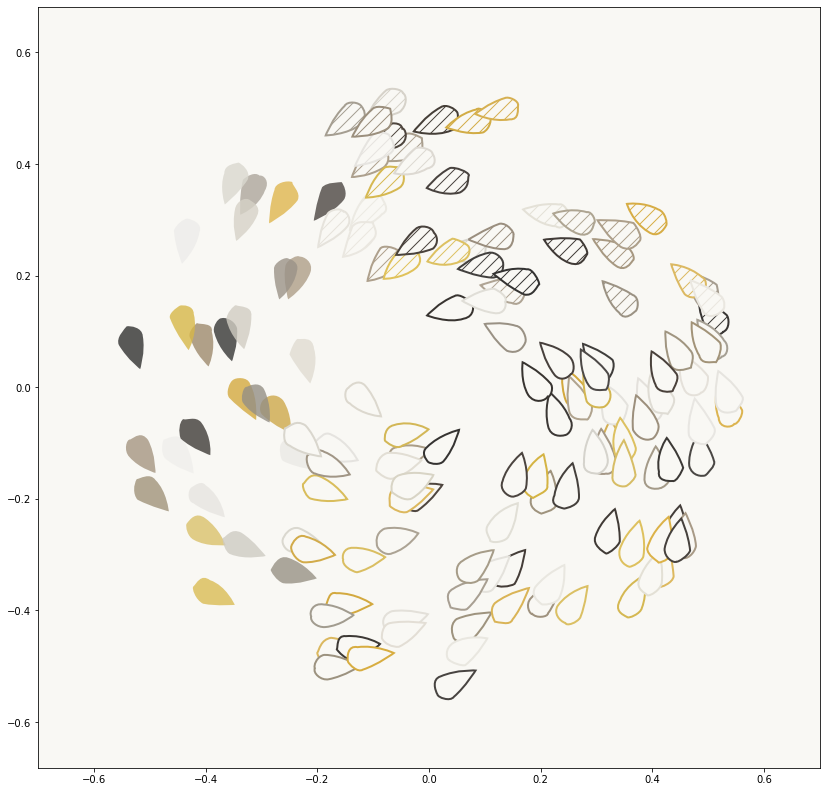

In [16]:
plt.rcParams['figure.figsize'] = [14, 14]
fig, subplot = plt.subplots()
subplot.axis('equal')
subplot.set_xlim(-.7, .7)
subplot.set_ylim(-.7, .7)

colors = ['#a69b89', '#443f3b', '#e1ded6', '#d8b54f']
fc = '#f9f8f4'
subplot.set_facecolor(fc)  

sources = ((np.array((.0, .0)), np.pi/2.5),
          )
field = vf.CurlField(sources=sources)

trace_segments = 2
n_traces = 180
starting_points = np.random.rand(n_traces, 2) - np.array((.5, .5))
starting_points = [p for p in starting_points if la.norm(p) < .5]  # make it circle
traces = field.compute_traces(starting_points, trace_segments)
for trace in traces:
    u, v = trace[1] - trace[0]
    p = get_path()        
    r = rotation_matrix_by_2_vec((u, v), (1, 0))
    add_noize_to_path(p, max_delta=.08)
    p.vertices *= .08
    p.vertices = p.vertices.dot(r)
    p.vertices += trace[0]
    hatch = '//' if trace[0][1] > .15 else None
    if trace[0][0] < -.18:
        ffc = similar_color(np.random.choice(colors), max_delta=.15)
        alpha = .8
        hatch = None
        lw = 0
        ec = None
    else:
        ffc = fc
        alpha = 1
        ec = similar_color(np.random.choice(colors))
        lw = 2
    patch = patches.PathPatch(p, alpha=alpha, lw=lw, hatch=hatch, fc=ffc, ec=ec)
    subplot.add_patch(patch)